In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


In [13]:
df= pd.read_csv("processed_dataset.csv")

In [9]:
df

,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Capacity (Tons),Year,city
0,1,6610,68,11191,9,1,3056,14,45575,2019,1
1,2,1181,56,11191,5,1,2778,12,45575,2019,1
2,3,8162,53,11191,8,2,3390,13,45575,2019,1
3,4,8929,56,11191,5,3,1498,14,45575,2019,1
4,5,5032,44,11191,7,4,2221,16,45575,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
845,1,6842,42,11280,8,4,3546,15,54460,2023,34
846,2,5233,38,11280,10,4,1146,5,54460,2023,34
847,3,9903,41,11280,7,3,3260,4,54460,2023,34
848,4,7540,77,11280,6,1,4220,7,54460,2023,34


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

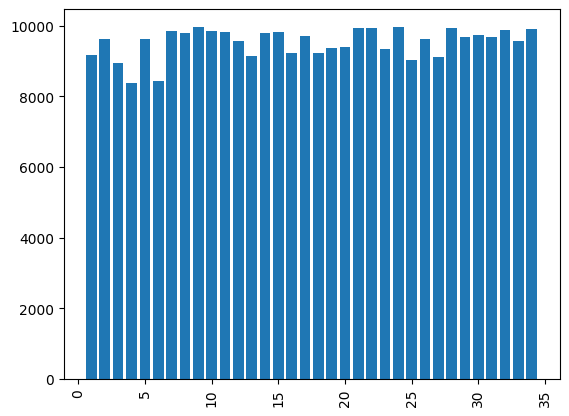

In [23]:
plt.bar(df['city'], df['Waste Generated (Tons/Day)'])
plt.xticks(rotation=90)

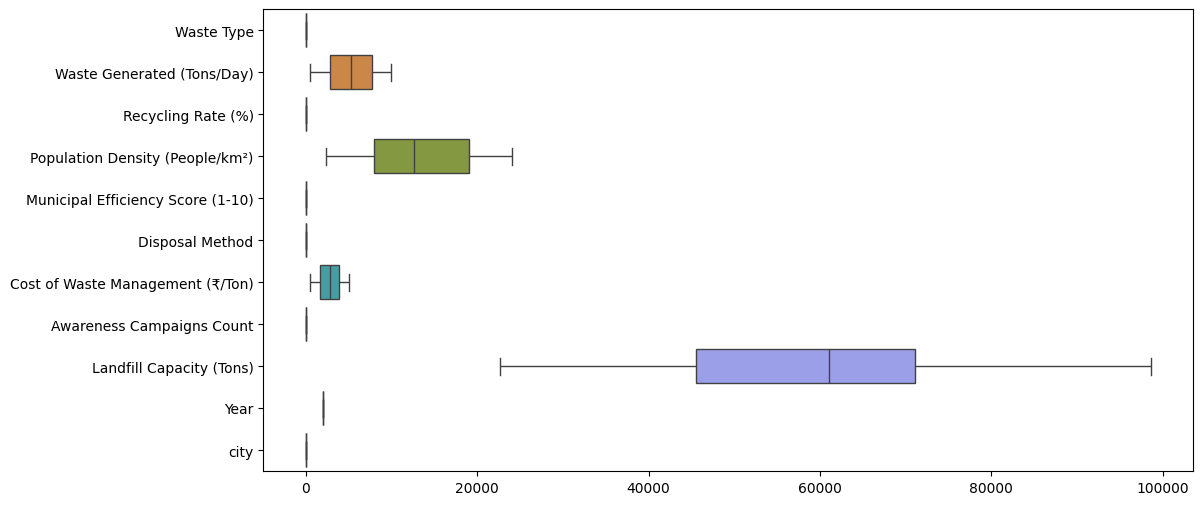

In [17]:
#Checking for outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.show()

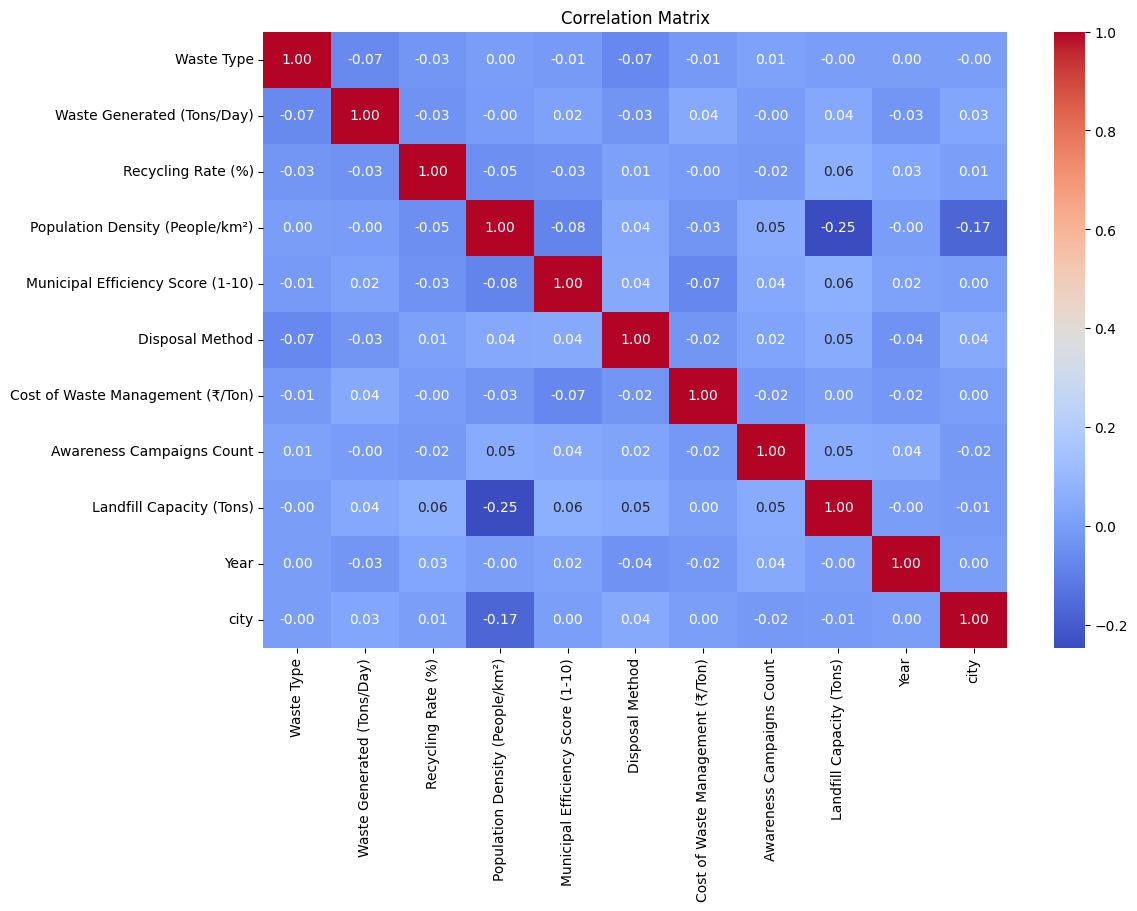

In [18]:
# correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

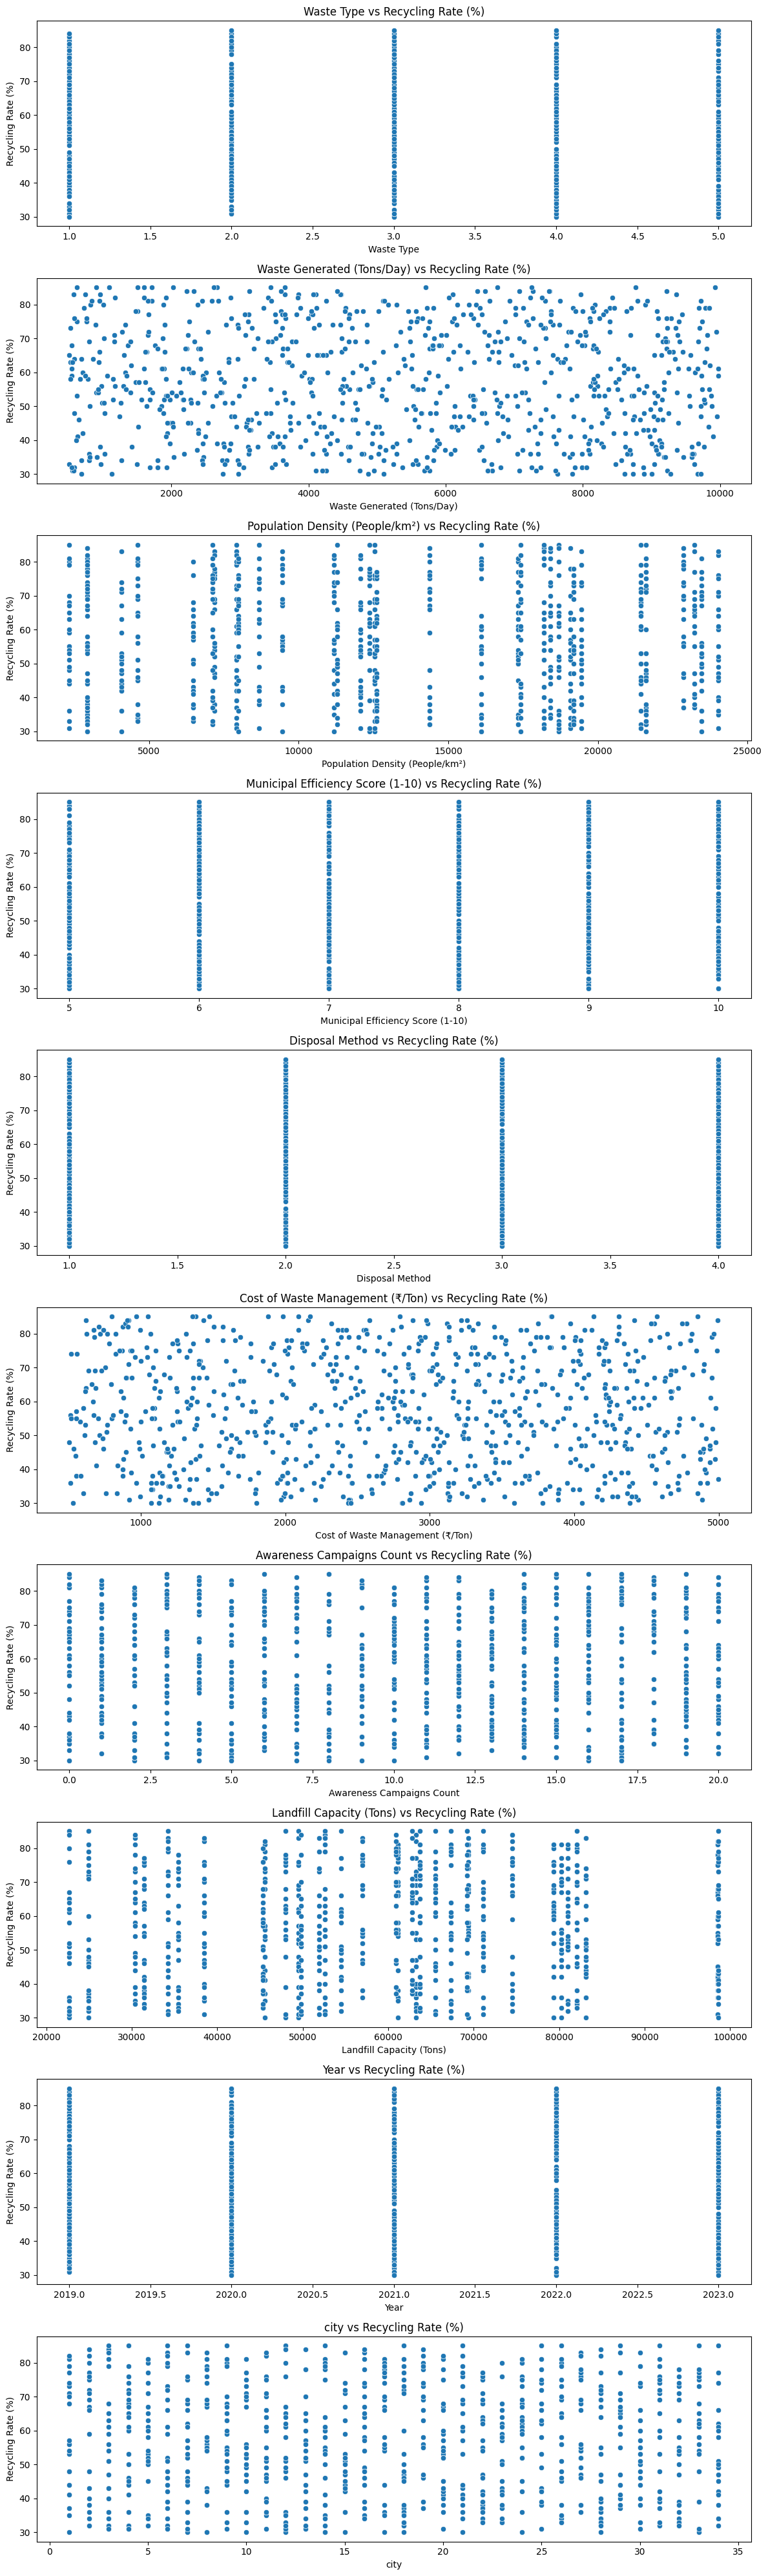

In [19]:
# Predictive relationships with target variable in one line 3 plots

target = 'Recycling Rate (%)'
features = [col for col in df.columns if col != target]

plt.figure(figsize=(12, len(features) * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    if df[feature].dtype in ['int64', 'float64']:
        sns.scatterplot(data=df, x=feature, y=target)
    else:
        sns.boxplot(data=df, x=feature, y=target)
    plt.title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()

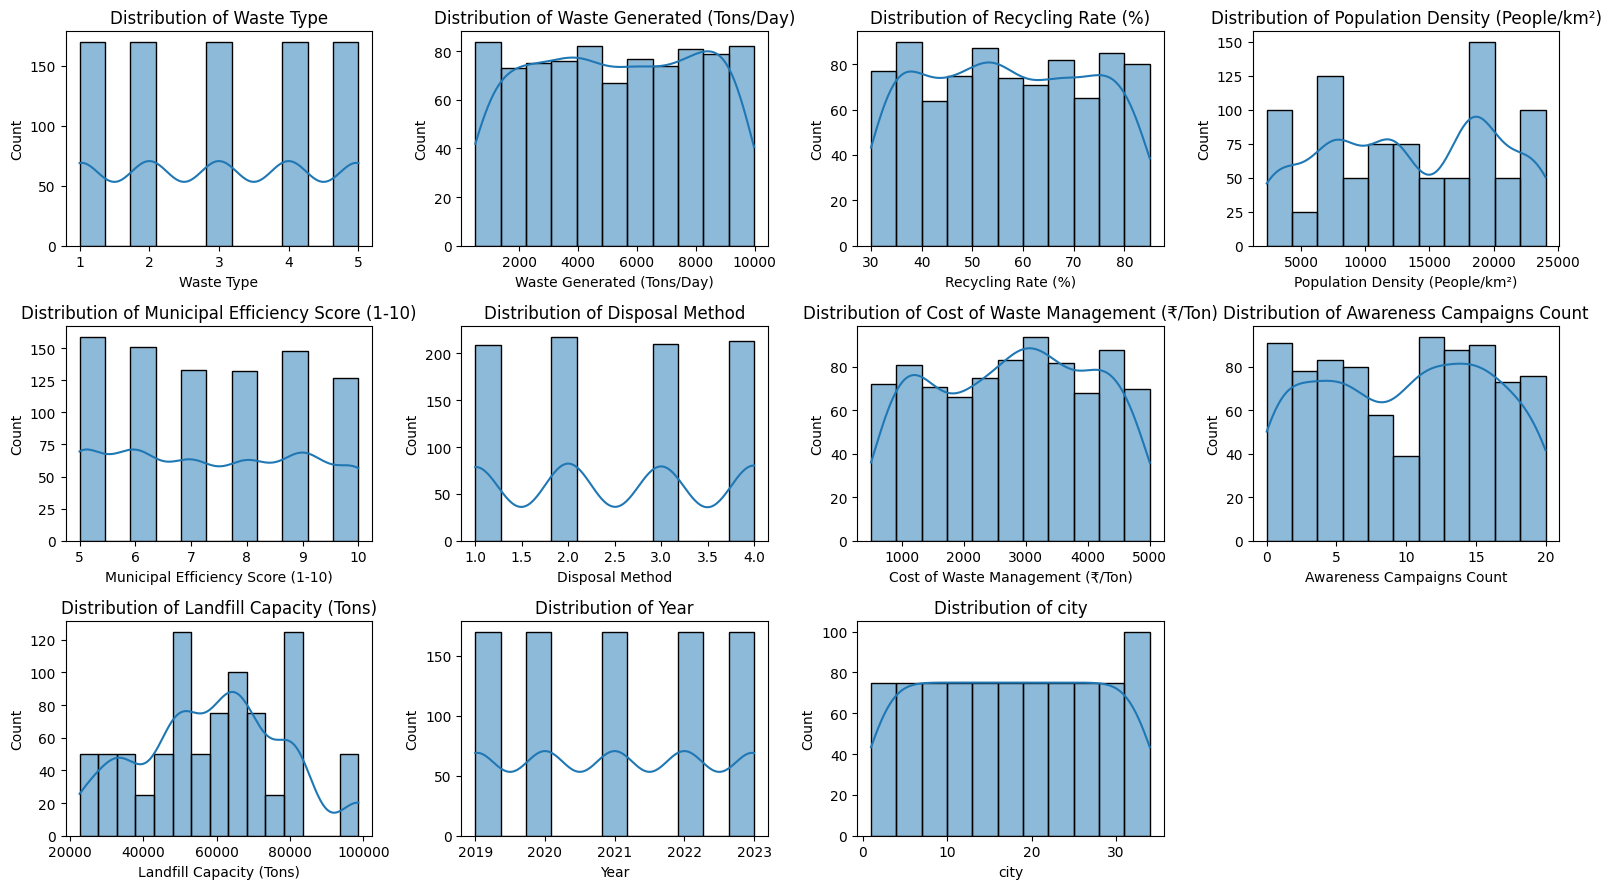

In [20]:
# Data Distribution Checks
import math
cols = 4
rows = math.ceil(len(df.columns) / cols)

plt.figure(figsize=(cols*4, rows*3))

for i, feature in enumerate(df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()